### Load Dataset

In [1]:
import pandas as pd

# Load file hasil preprocessing
df = pd.read_csv('/content/hasil_preprocessing.csv')

# Tampilkan 5 data pertama
df.head()


,Tweet,Label,text_akhir
0,Kecemasan saya memberitahu saya untuk tidak ju...,Negative,cemas memberitahu jujurrentan kencan cemas mem...
1,Khawatir saya menderita kanker ovarium. Semaki...,Negative,khawatir derita kanker ovarium media sosial de...
2,Untuk Penderita HA yang memiliki kecemasan yan...,Negative,derita tertawa milik cemas beda takut beda ter...
3,"Eye floaters karena stres? Halo, Saya baru-bar...",Negative,eye floaters stres halo barubaru periksa mata ...
4,"Ada rasa cemas berlebihan saat ini, .Dan, masi...",Negative,rasa cemas


### hapus NaN

In [2]:
# Hapus baris yang text_akhir-nya kosong
df = df.dropna(subset=['text_akhir'])


### Ubah Teks Menjadi Representasi Numerik (TF-IDF)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # ambil 1000 kata paling penting

# Transformasi kolom 'text_akhir' menjadi vektor TF-IDF
X_tfidf = vectorizer.fit_transform(df['text_akhir'])


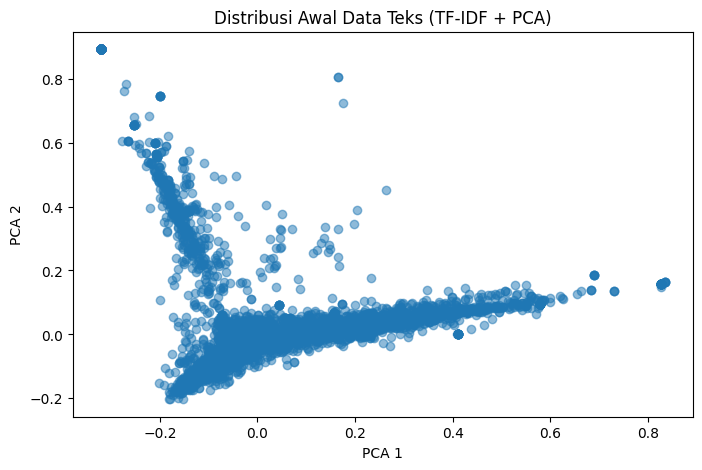

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ubah TF-IDF (sparse matrix) ke 2D dengan PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Plot hasil PCA
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('Distribusi Awal Data Teks (TF-IDF + PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


### Tentukan Jumlah Klaster Optimal dengan Metode Elbow

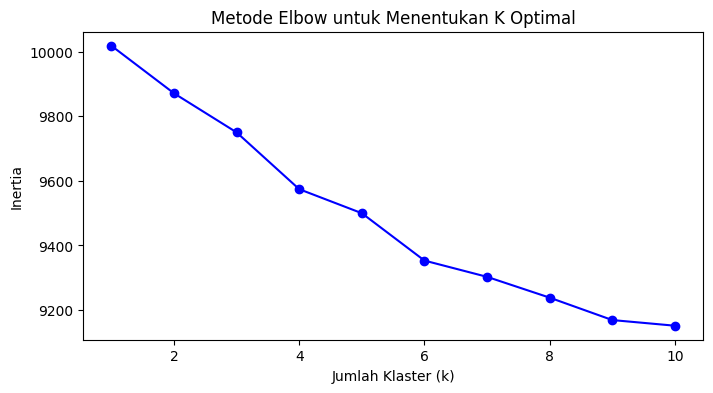

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

# Hitung inertia untuk setiap jumlah klaster
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()


### Clustering dengan K-Means

In [6]:
# Misal hasil elbow menunjukkan k=3
k_optimal = 3

# Inisialisasi dan latih K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Tambahkan hasil klaster ke DataFrame
df['cluster'] = clusters


### Simpan Hasil Clustering ke File CSV

In [7]:
# Simpan di direktori kerja saat ini
df.to_csv('hasil_clustering_tfidf.csv', index=False)
